In [33]:
import numpy as np
nan = np.nan
galaxy_names = ['M 31', 'M 33', 'M 51', 'M 74', 'M 81', 
'M 83', 'M 101', 'NGC 253', 'NGC 1097', 'NGC 1365', 
'NGC 1566', 'NGC 3627', 'NGC 4254', 'NGC 4414', 
'NGC 4449', 'NGC 4736', 'NGC 6946', 'IC 342', 'LMC']

# ps_l: Lower limit of pitch angles
ps_l = [
    7,  # M 31
    29,  # M 33
    15,  # M 51
    13,  # M 74
    14,  # M 81
    14,  # M 83
    10,  # M 101
    nan,  # NGC 253
    27,  # NGC 1097
    nan,  # NGC 1365
    19,  # NGC 1566
    10,  # NGC 3627
    6,  # NGC 4254
    20,  # NGC 4414
    nan,  # NGC 4449
    nan,  # NGC 4736
    20,  # NGC 6946
    10,  # IC 342
    nan  # LMC
]

# ps_m: Upper limit of pitch angles
ps_u = [
    8,  # M 31
    50,  # M 33
    25,  # M 51
    41,  # M 74
    24,  # M 81
    17,  # M 83
    30,  # M 101
    nan,  # NGC 253
    35,  # NGC 1097
    nan,  # NGC 1365
    21,  # NGC 1566
    50,  # NGC 3627
    72,  # NGC 4254
    40,  # NGC 4414
    nan,  # NGC 4449
    nan,  # NGC 4736
    28,  # NGC 6946
    25,  # IC 342
    nan  # LMC
]

# po: Last values of p_o
po = [
    [30,29,26,27,27],  # M 31
    [48,40,41,35],  # M 33
    [20,27,19],  # M 51
    [61,45,19,24],  # M 74
    [21,26],  # M 81
    [35,23,32,20],  # M 83
    [39,30,28],  # M 101
    [25],  # NGC 253
    [nan],  # NGC 1097
    [nan],  # NGC 1365
    [29,17,15],  # NGC 1566
    [16,27,68],  # NGC 3627
    [28,27,30,26,22,24],  # NGC 4254
    [30,27,27,26],  # NGC 4414
    [28],  # NGC 4449
    [35],  # NGC 4736
    [27,21,10,30,32,10],  # NGC 6946
    [22,16,20,16,19,10,19,25,18,10],  # IC 342
    [nan]  # LMC
]

pB = [
    [13, 19, 11, 8, 4, 9, 7, 7, 5],  # M 31
    [51,41],  # M 33
    [20,24,22,18],  # M 51
    [nan],  # M 74 (no data)
    [6,20,14,14],  # M 81
    [nan],  # M 83 (no data)
    [nan],  # M 101 (no data)
    [26],  # NGC 253
    [34,36,23],  # NGC 1097
    [34,17,31,22,37,29,33],  # NGC 1365
    [nan],  # NGC 1566 (no data)
    [nan],  # NGC 3627 (no data)
    [27,24,29],  # NGC 4254
    [22],  # NGC 4414 (no data)
    [59,38],  # NGC 4449
    [nan],  # NGC 4736 (no data)
    [nan],  # NGC 6946 (no data)
    [0,6,34,7,20,16,30,4],  # IC 342
    [4]  # LMC
]

In [34]:
ps_f = np.nanmean([ps_l, ps_u], axis=0)
po_f = np.array([np.mean(np.array(p)) for p in po])
pB_f = np.array([np.mean(np.array(p)) for p in pB])

po_u = np.array([np.max(np.array(p)) for p in po])
po_l = np.array([np.min(np.array(p)) for p in po])

pB_u = np.array([np.max(np.array(p)) for p in pB])
pB_l = np.array([np.min(np.array(p)) for p in pB])



C:\Users\Admin\AppData\Local\Temp\ipykernel_38752\905265616.py:1: RuntimeWarning: Mean of empty slice
  ps_f = np.nanmean([ps_l, ps_u], axis=0)


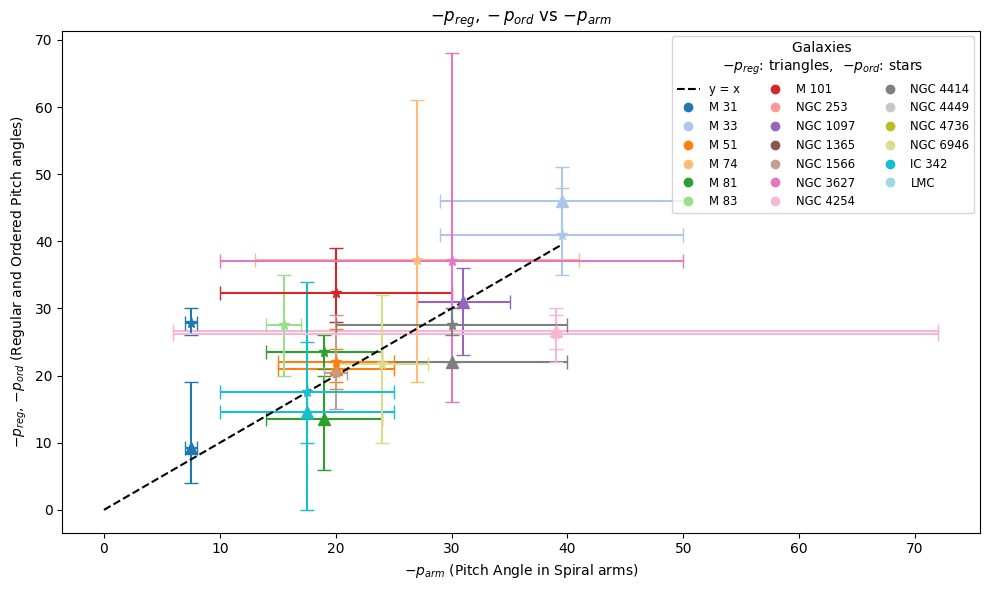

In [35]:
import matplotlib.pyplot as plt
# Create a single plot with error bars for both x and y axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a color map for galaxies
colors = plt.cm.tab20(np.linspace(0, 1, len(galaxy_names)))

ps_errors = [ps_f - ps_l, ps_u - ps_f]  # X-axis errors from lower and upper limits
po_errors = [po_f - po_l, po_u - po_f]  # X-axis errors from lower and upper limits
pB_errors = [pB_f - pB_l, pB_u - pB_f]  # X-axis errors from lower and upper limits



# Plot pB vs ps with error bars (triangles)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps_f[i]) and not np.isnan(pB_f[i]):
        ax1.errorbar(ps_f[i], pB_f[i], xerr=[[ps_errors[0][i]], [ps_errors[1][i]]],
                     yerr=[[pB_errors[0][i]], [pB_errors[1][i]]], fmt='^', color=color, alpha=1, capsize=5, markersize= 8)

# Plot po vs ps with error bars (stars)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps_f[i]) and not np.isnan(po_f[i]):
        ax1.errorbar(ps_f[i], po_f[i], xerr=[[ps_errors[0][i]], [ps_errors[1][i]]],
                     yerr=[[po_errors[0][i]], [po_errors[1][i]]], fmt='*', color=color, alpha=1, capsize=5, markersize= 8)

# y = x line for reference
ax1.plot([0, max(ps_f)], [0, max(ps_f)], 'k--', label='y = x')

# Axis labels and titles
ax1.set_xlabel(r'$-p_{arm}$ (Pitch Angle in Spiral arms)')
ax1.set_ylabel(r'$-p_{reg}$, $-p_{ord}$ (Regular and Ordered Pitch angles)')
ax1.set_title(r'$-p_{reg}, -p_{ord}$ vs $-p_{arm}$')

# Legend with galaxy colors
for i, galaxy in enumerate(galaxy_names):
    ax1.plot([], [], 'o', color=colors[i], label=galaxy)
ax1.legend(loc='upper right', ncol=3, fontsize='small',
           title='                Galaxies\n$-p_{reg}$: triangles,  $-p_{ord}$: stars')

plt.tight_layout()
plt.show()
fig.savefig('averaged_plots.jpeg')


In [36]:
# Pearson correlation coefficients
corr_ps_po = np.corrcoef(ps_f[~np.isnan(ps_f) & ~np.isnan(po_f)], po_f[~np.isnan(ps_f) & ~np.isnan(po_f)])[0, 1]
corr_ps_pB = np.corrcoef(ps_f[~np.isnan(ps_f) & ~np.isnan(pB_f)], pB_f[~np.isnan(ps_f) & ~np.isnan(pB_f)])[0, 1]
corr_po_pB = np.corrcoef(po_f[~np.isnan(po_f) & ~np.isnan(pB_f)], pB_f[~np.isnan(po_f) & ~np.isnan(pB_f)])[0, 1]

print(f'$p_{{ord}}$ vs $p_{{arm}}$ | Pearson Correlation: {corr_ps_po:.2f}')

print(f'$p_{{reg}}$ vs $p_{{arm}}$ | Pearson Correlation: {corr_ps_pB:.2f}')

print(f'$p_{{reg}}$ vs $p_{{ord}}$ | Pearson Correlation: {corr_po_pB:.2f}')

$p_{ord}$ vs $p_{arm}$ | Pearson Correlation: 0.49
$p_{reg}$ vs $p_{arm}$ | Pearson Correlation: 0.86
$p_{reg}$ vs $p_{ord}$ | Pearson Correlation: 0.65


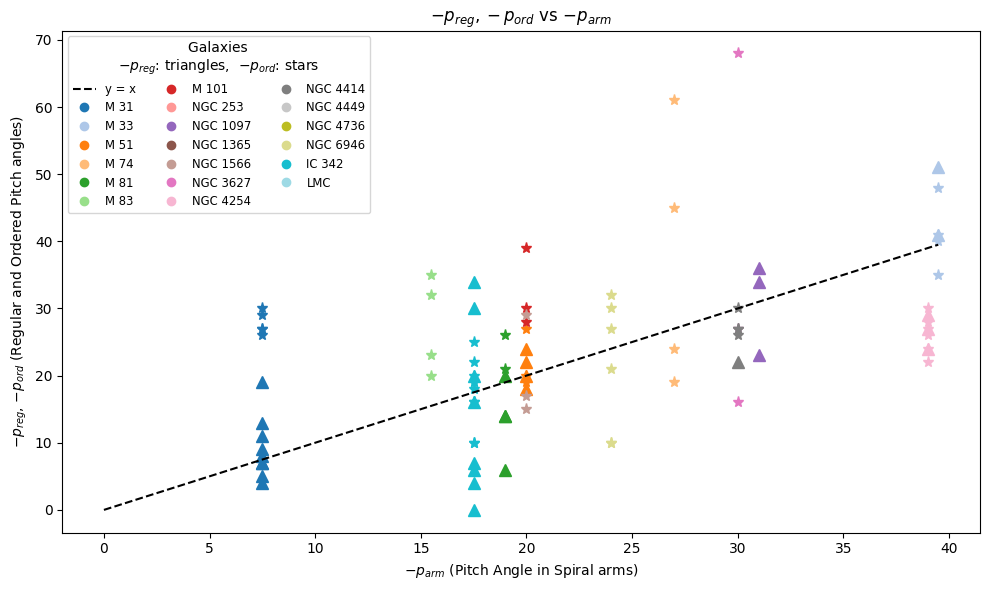

In [37]:
import matplotlib.pyplot as plt
# Create a single plot with error bars for both x and y axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a color map for galaxies
colors = plt.cm.tab20(np.linspace(0, 1, len(galaxy_names)))

ps_errors = [ps_f - ps_l, ps_u - ps_f]  # X-axis errors from lower and upper limits
po_errors = [po_f - po_l, po_u - po_f]  # X-axis errors from lower and upper limits
pB_errors = [pB_f - pB_l, pB_u - pB_f]  # X-axis errors from lower and upper limits



# Plot pB vs ps with error bars (triangles)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps_f[i]) and not np.isnan(pB_f[i]):
        for p in pB[i]:
            ax1.plot(ps_f[i], p, '^', color=color, alpha=1, markersize= 8)
        #ax1.fill_betweenx([0, 70], ps_l[i], ps_u[i], color=color, alpha=0.2) 

# Plot po vs ps with error bars (stars)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps_f[i]) and not np.isnan(po_f[i]):
        for p in po[i]:
            ax1.plot(ps_f[i], p, '*', color=color, alpha=1, markersize= 8)
        #ax1.fill_betweenx([0, 70], ps_l[i], ps_u[i], color=color, alpha=0.2) 

# y = x line for reference
ax1.plot([0, max(ps_f)], [0, max(ps_f)], 'k--', label='y = x')

# Axis labels and titles
ax1.set_xlabel(r'$-p_{arm}$ (Pitch Angle in Spiral arms)')
ax1.set_ylabel(r'$-p_{reg}$, $-p_{ord}$ (Regular and Ordered Pitch angles)')
ax1.set_title(r'$-p_{reg}, -p_{ord}$ vs $-p_{arm}$')

# Legend with galaxy colors
for i, galaxy in enumerate(galaxy_names):
    ax1.plot([], [], 'o', color=colors[i], label=galaxy)
ax1.legend(loc='upper left', ncol=3, fontsize='small',
           title='                Galaxies\n$-p_{reg}$: triangles,  $-p_{ord}$: stars')

plt.tight_layout()
plt.show()
fig.savefig('all_datapoints.jpeg')


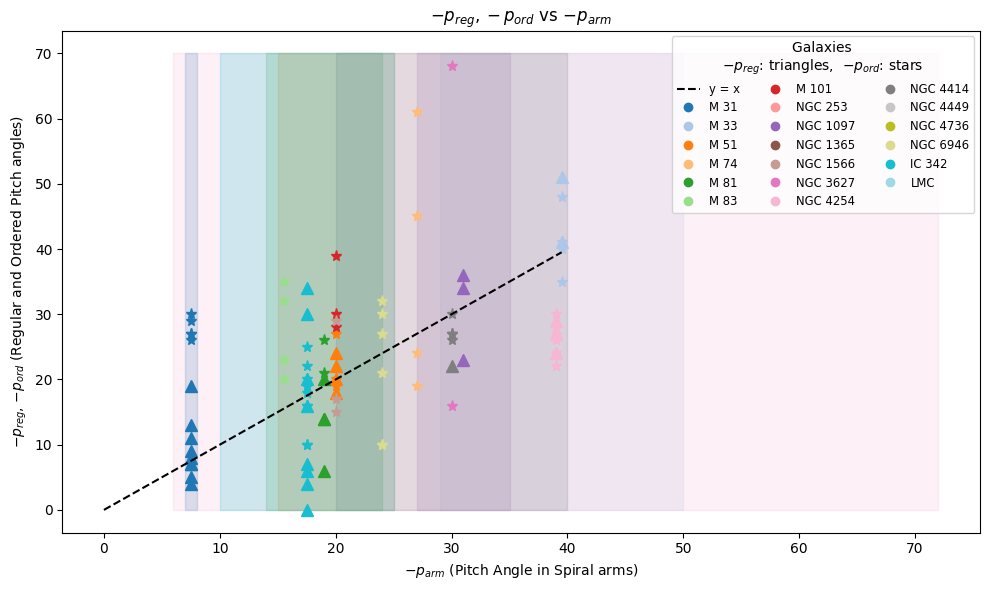

In [38]:
import matplotlib.pyplot as plt
# Create a single plot with error bars for both x and y axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a color map for galaxies
colors = plt.cm.tab20(np.linspace(0, 1, len(galaxy_names)))

ps_errors = [ps_f - ps_l, ps_u - ps_f]  # X-axis errors from lower and upper limits
po_errors = [po_f - po_l, po_u - po_f]  # X-axis errors from lower and upper limits
pB_errors = [pB_f - pB_l, pB_u - pB_f]  # X-axis errors from lower and upper limits



# Plot pB vs ps with error bars (triangles)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps_f[i]) and not np.isnan(pB_f[i]):
        for p in pB[i]:
            ax1.plot(ps_f[i], p, '^', color=color, alpha=1, markersize= 8)
        ax1.fill_betweenx([0, 70], ps_l[i], ps_u[i], color=color, alpha=0.2) 

# Plot po vs ps with error bars (stars)
for i, (galaxy, color) in enumerate(zip(galaxy_names, colors)):
    if not np.isnan(ps_f[i]) and not np.isnan(po_f[i]):
        for p in po[i]:
            ax1.plot(ps_f[i], p, '*', color=color, alpha=1, markersize= 8)
        #ax1.fill_betweenx([0, 70], ps_l[i], ps_u[i], color=color, alpha=0.2) 

# y = x line for reference
ax1.plot([0, max(ps_f)], [0, max(ps_f)], 'k--', label='y = x')

# Axis labels and titles
ax1.set_xlabel(r'$-p_{arm}$ (Pitch Angle in Spiral arms)')
ax1.set_ylabel(r'$-p_{reg}$, $-p_{ord}$ (Regular and Ordered Pitch angles)')
ax1.set_title(r'$-p_{reg}, -p_{ord}$ vs $-p_{arm}$')

# Legend with galaxy colors
for i, galaxy in enumerate(galaxy_names):
    ax1.plot([], [], 'o', color=colors[i], label=galaxy)
ax1.legend(loc='upper right', ncol=3, fontsize='small',
           title='                Galaxies\n$-p_{reg}$: triangles,  $-p_{ord}$: stars')

plt.tight_layout()
plt.show()
fig.savefig('all_datapoints_pserrors.jpeg')


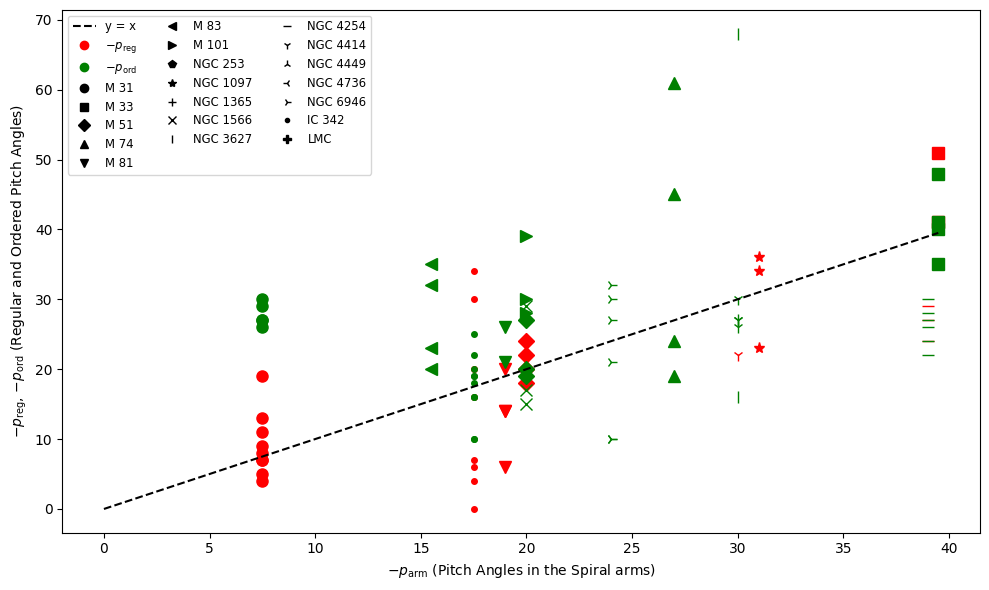

In [46]:
import matplotlib.pyplot as plt
# Create a single plot with error bars for both x and y axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define a color map for galaxies
colors = plt.cm.tab20(np.linspace(0, 1, len(galaxy_names)))
shift = 5
#markers = list(plt.Line2D.markers.keys())[shift:len(galaxy_names)+shift]
markers = [
    'o',   # Circle
    's',   # Square
    'D',   # Diamond
    '^',   # Triangle Up
    'v',   # Triangle Down
    '<',   # Triangle Left
    '>',   # Triangle Right
    'p',   # Pentagon
    '*',   # Star
    '+',   # Plus
    'x',   # X
    '|',   # Vertical Line
    '_',   # Horizontal Line
    '1',   # Tripod Down
    '2',   # Tripod Up
    '3',   # Tripod Left
    '4',   # Tripod Right
    '.',   # Pixel (very small dot)
    'P'   # Comma (tiny point)
]


ps_errors = [ps_f - ps_l, ps_u - ps_f]  # X-axis errors from lower and upper limits
po_errors = [po_f - po_l, po_u - po_f]  # X-axis errors from lower and upper limits
pB_errors = [pB_f - pB_l, pB_u - pB_f]  # X-axis errors from lower and upper limits



# Plot pB vs ps with error bars (triangles)
for i, (galaxy, marker) in enumerate(zip(galaxy_names, markers)):
    if not np.isnan(ps_f[i]) and not np.isnan(pB_f[i]):
        for p in pB[i]:
            ax1.plot(ps_f[i], p, marker, color='r', alpha=1, markersize= 8)
        #ax1.fill_betweenx([0, 70], ps_l[i], ps_u[i], color=color, alpha=0.2) 

# Plot po vs ps with error bars (stars)
for i, (galaxy, marker) in enumerate(zip(galaxy_names, markers)):
    if not np.isnan(ps_f[i]) and not np.isnan(po_f[i]):
        for p in po[i]:
            ax1.plot(ps_f[i], p, marker, color='g', alpha=1, markersize= 8)
        #ax1.fill_betweenx([0, 70], ps_l[i], ps_u[i], color=color, alpha=0.2) 

# y = x line for reference
ax1.plot([0, max(ps_f)], [0, max(ps_f)], 'k--', label='y = x')

# Axis labels and titles
ax1.set_xlabel(r'$-p_\mathrm{arm}$ (Pitch Angles in the Spiral arms)')
ax1.set_ylabel(r'$-p_\mathrm{reg}$, $-p_\mathrm{ord}$ (Regular and Ordered Pitch Angles)')
# ax1.set_title(r'$-p_{reg}, -p_{ord}$ vs $-p_{arm}$')

# Legend with galaxy colors
ax1.plot([], [], 'o', color='r', label=r'$-p_\mathrm{reg}$')
ax1.plot([], [], 'o', color='g', label=r'$-p_\mathrm{ord}$')
for i, galaxy in enumerate(galaxy_names):
    ax1.plot([], [], markers[i], color='k', label=galaxy)


ax1.legend(loc='upper left', ncol=3, fontsize='small')# \n$-p_{reg}$: red,  $-p_{ord}$: green')

plt.tight_layout()
plt.show()
fig.savefig('pitch_angle_correlation.png', format="png", dpi=600, bbox_inches='tight')
